<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
</figure>
    
# Whatsapp analysis

developed by Onno Ebbens


this notebook is created for the Mamba python course as an example for big data analysis. The data was obtained by exporting a single Whatsapp chat. See https://faq.whatsapp.com/en/android/23756533/ to export your own data.

table of content:<a class="anchor" id="0"></a>
1. [import files](#1)
2. [read whatsapp data](#2)
3. [plot hourly messages](#3)
4. [wordcloud](#4)
5. [text length](#5)

## 1. import files<a class="anchor" id="1"></a>

In [23]:
import matplotlib.pyplot as plt
import zipfile
import os
import re
import pandas as pd
import wordcloud
import whatsapp_func as wf

In [24]:
#settings
%matplotlib inline
plt.style.use('seaborn')

## 2. read whatsapp data <a class="anchor" id="2"></a>
because of privacy issues I did not include the zip file in the GIT repository. You can use your own export zip file or use the anonymised pandas dataframe file: "_chat_df.csv". 

In [73]:
# read whatsapp data
whatsapp_zip = r'data\WhatsApp Chat - xxx xxx.zip'

time_user_df = wf.read_whatsapp(whatsapp_zip)

## 3. anonymize data <a class="anchor" id="2"></a>
because of privacy issues I anonymised my data. I did this with the following cells. If you are running your own analysis, you can skip these lines.

In [80]:
# save anonymised dataframe
time_user_df[['user','message']].to_csv(r'data\_chat_df.csv')

In [81]:
# read anonymised dataframe
time_user_df = pd.read_csv(r'data\_chat_df.csv', index_col=0, parse_dates=True)
time_user_df.head()

,user,message
2018-03-22 12:18:07,user1,1
2018-03-22 12:18:07,user1,1
2018-03-22 12:18:19,user1,1
2018-03-22 14:39:57,user2,1
2018-03-22 14:40:03,user2,1


## 3. plot hourly messages<a class="anchor" id="4"></a>

In [74]:
time_user_df['hour'] = time_user_df.index.hour

hourly_messages_df = pd.DataFrame(index=range(24))
for user in time_user_df.user.unique():
    hourly_message_per_user = time_user_df[time_user_df.user==user].groupby(by='hour').sum()
    hourly_message_per_user.rename(columns={'message': user}, inplace=True)
    hourly_messages_df[user] = hourly_message_per_user[user]

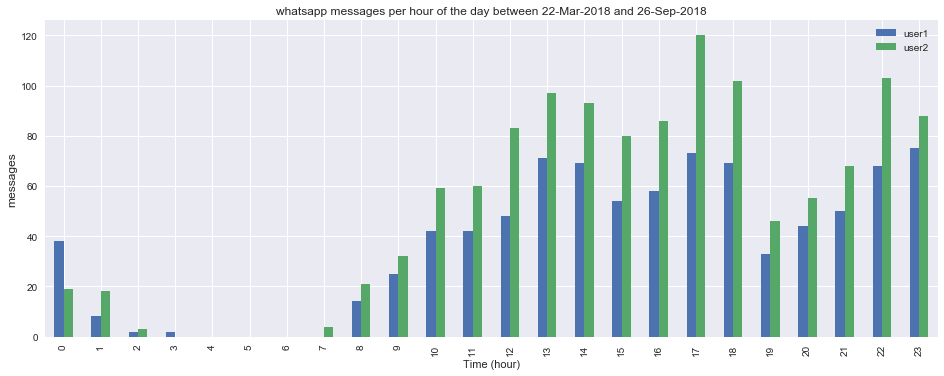

In [75]:
# plot
fig = plt.figure(figsize=(16,16/2.75))
ax = plt.subplot()

# # format axes
ax.set_xlabel('Time (hour)')
ax.set_ylabel('messages', fontsize=12)

# create title
start_date = time_user_df.index[0].strftime('%d-%b-%Y')
end_date   = time_user_df.index[-1].strftime('%d-%b-%Y')
ax.set_title('whatsapp messages per hour of the day between %s and %s'%(start_date, end_date))

hourly_messages_df.plot(kind='bar', ax=ax)
fig.savefig(r'figures\messages_per_hour_per_user.png', bbox_inches='tight')

## 4. plot wordcloud<a class="anchor" id="4"></a>

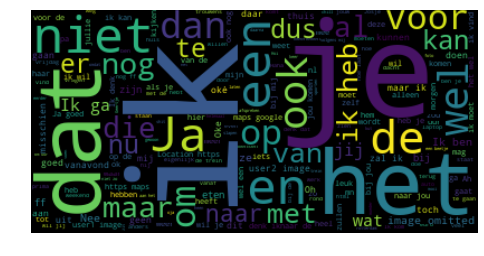

In [76]:
wd = wordcloud.WordCloud().generate(' '.join(time_user_df['text'].values))
plt.imshow(wd, interpolation='bilinear')
plt.axis("off")
plt.savefig(r'figures\word_cloud.png', bbox_inches='tight')

## 5. plot text lengte<a class="anchor" id="5"></a>

In [77]:
for user in time_user_df.user.unique():
    print('average text length for %s is %i characters'%(user, time_user_df[time_user_df.user==user].text.str.len().mean()))

average text length for user1 is 39 characters
average text length for user2 is 41 characters


In [78]:
time_user_df['hour'] = time_user_df.index.hour
time_user_df['text_length'] = time_user_df.text.str.len()

hourly_text_length_df = pd.DataFrame(index=range(24))
for user in time_user_df.user.unique():
    hourly_text_length_per_user = time_user_df[time_user_df.user==user].groupby(by='hour').mean()
    hourly_text_length_per_user.rename(columns={'text_length': user}, inplace=True)
    hourly_text_length_df[user] = hourly_text_length_per_user[user]

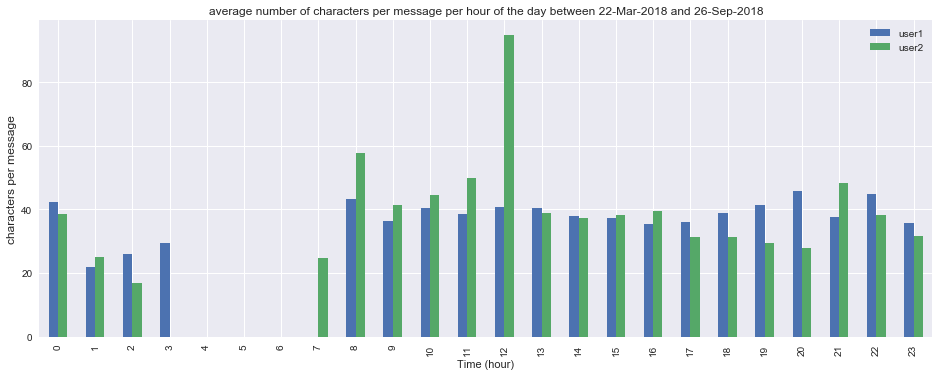

In [79]:
# plot
fig = plt.figure(figsize=(16,16/2.75))
ax = plt.subplot()

# # format axes
ax.set_xlabel('Time (hour)')
ax.set_ylabel('characters per message', fontsize=12)

# create title
start_date = time_user_df.index[0].strftime('%d-%b-%Y')
end_date   = time_user_df.index[-1].strftime('%d-%b-%Y')
ax.set_title('average number of characters per message per hour of the day between %s and %s'%(start_date, end_date))

hourly_text_length_df.plot(kind='bar', ax=ax)
fig.savefig(r'figures\characters_per_message_per_user.png', bbox_inches='tight')